In [60]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
from sklearn.metrics import precision_recall_curve, average_precision_score

In [62]:
import warnings
warnings.filterwarnings('ignore')

In [63]:
result= pd.read_csv('FINAL_RF_PREDICTIONS.csv')

In [64]:
result.head()

,y_true,y_pred,y_pred_proba
0,1.0,1.0,0.729470
1,0.0,1.0,0.862705
2,0.0,0.0,0.000000
3,1.0,1.0,0.995270
4,1.0,1.0,0.846613


In [65]:
y_true = result['y_true']
y_pred = result['y_pred']
y_pred_proba = result['y_pred_proba']

In [66]:
# 1.1: Accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.94


In [67]:
# 1.2: Precision
precision = precision_score(y_true, y_pred)
print(f"Precision: {precision:.2f}")

Precision: 0.90


In [68]:
# 1.3: Recall
recall = recall_score(y_true, y_pred)
print(f"Recall: {recall:.2f}")

Recall: 1.00


In [69]:
# 1.4: F1 Score
f1 = f1_score(y_true, y_pred)
print(f"F1 Score: {f1:.2f}")


F1 Score: 0.95


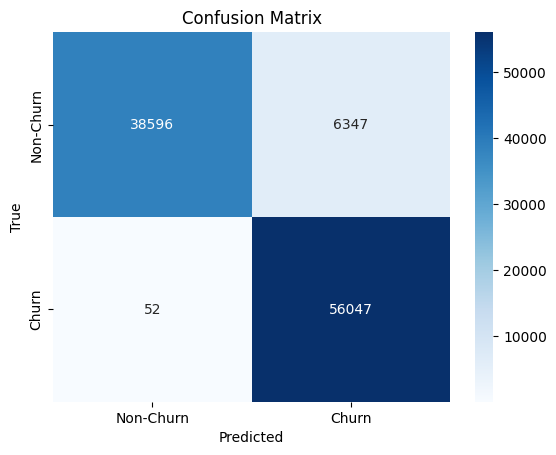

In [70]:
# 1.5: Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Churn', 'Churn'], yticklabels=['Non-Churn', 'Churn'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [71]:
# Step 2: Classification Report
print("Classification Report:")
print(classification_report(y_true, y_pred))

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.86      0.92     44943
         1.0       0.90      1.00      0.95     56099

    accuracy                           0.94    101042
   macro avg       0.95      0.93      0.93    101042
weighted avg       0.94      0.94      0.94    101042



In [72]:
# Step 3: ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba)
roc_auc = roc_auc_score(y_true, y_pred_proba)
print(f"ROC AUC: {roc_auc:.4f}")

ROC AUC: 0.9532


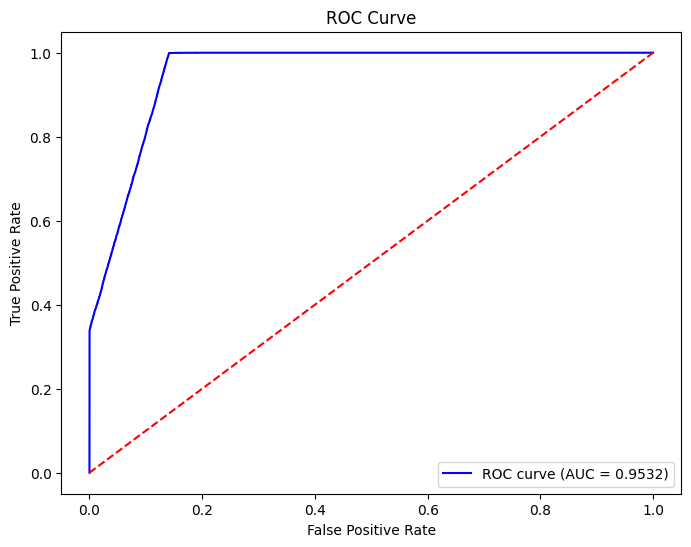

In [73]:
# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [74]:
# Step 4: Precision-Recall Curve
precision_vals, recall_vals, _ = precision_recall_curve(y_true, y_pred_proba)
average_precision = average_precision_score(y_true, y_pred_proba)
print(f"Average Precision: {average_precision:.4f}")

Average Precision: 0.9536


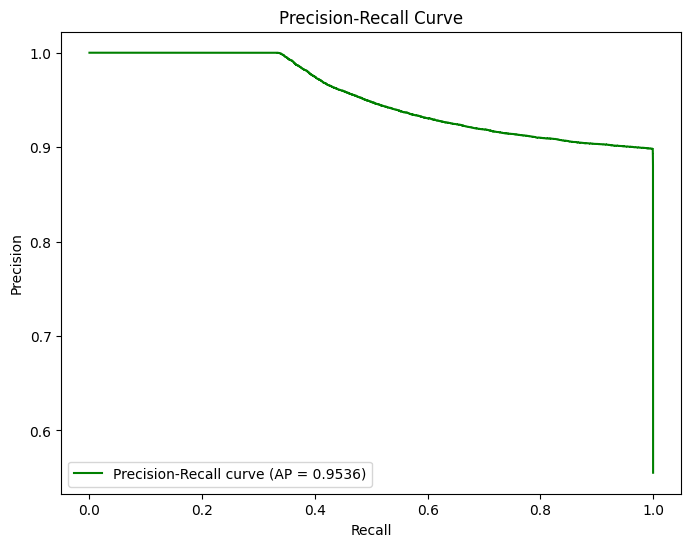

In [75]:
# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall_vals, precision_vals, color='green', label=f'Precision-Recall curve (AP = {average_precision:.4f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

In [76]:
# Step 5: AUC of Precision-Recall Curve
# The AUC of the Precision-Recall Curve is the area under the curve in the Precision-Recall plot
from sklearn.metrics import auc
pr_auc = auc(recall_vals, precision_vals)
print(f"Precision-Recall AUC: {pr_auc:.4f}")

Precision-Recall AUC: 0.9536


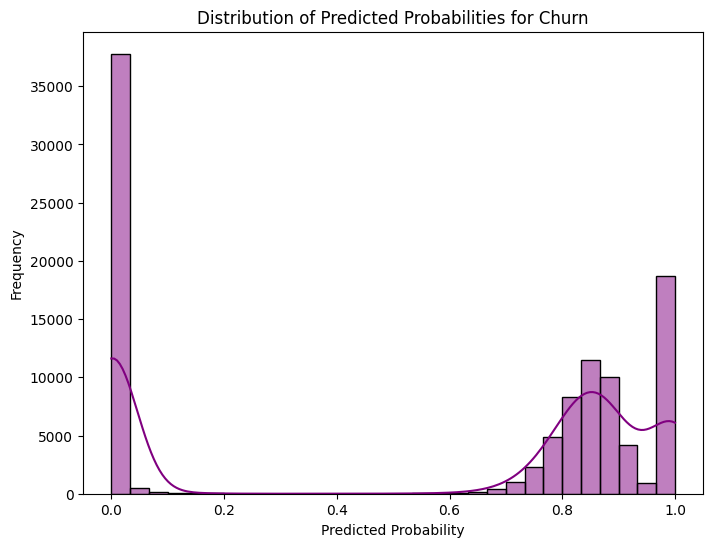

In [77]:
# Step 6: Distribution of Predicted Probabilities
plt.figure(figsize=(8, 6))
sns.histplot(result['y_pred_proba'], bins=30, kde=True, color='purple')
plt.title('Distribution of Predicted Probabilities for Churn')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.show()

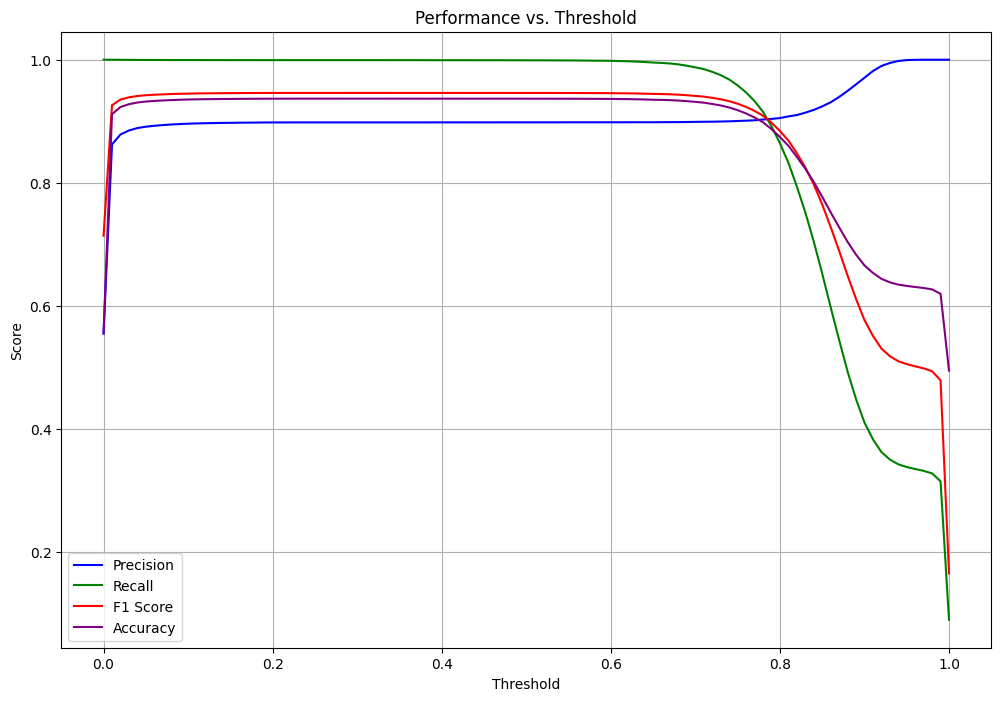

In [78]:
# Step 7: Threshold Analysis
# Let's analyze the effect of different thresholds on performance
thresholds_range = np.linspace(0, 1, 101)
precision_list = []
recall_list = []
f1_list = []
accuracy_list = []

for threshold in thresholds_range:
    y_pred_thresholded = (y_pred_proba >= threshold).astype(int)
    precision_list.append(precision_score(y_true, y_pred_thresholded))
    recall_list.append(recall_score(y_true, y_pred_thresholded))
    f1_list.append(f1_score(y_true, y_pred_thresholded))
    accuracy_list.append(accuracy_score(y_true, y_pred_thresholded))

# Plot Precision, Recall, F1 Score, and Accuracy vs. Threshold
plt.figure(figsize=(12, 8))
plt.plot(thresholds_range, precision_list, label='Precision', color='blue')
plt.plot(thresholds_range, recall_list, label='Recall', color='green')
plt.plot(thresholds_range, f1_list, label='F1 Score', color='red')
plt.plot(thresholds_range, accuracy_list, label='Accuracy', color='purple')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Performance vs. Threshold')
plt.legend()
plt.grid(True)
plt.show()

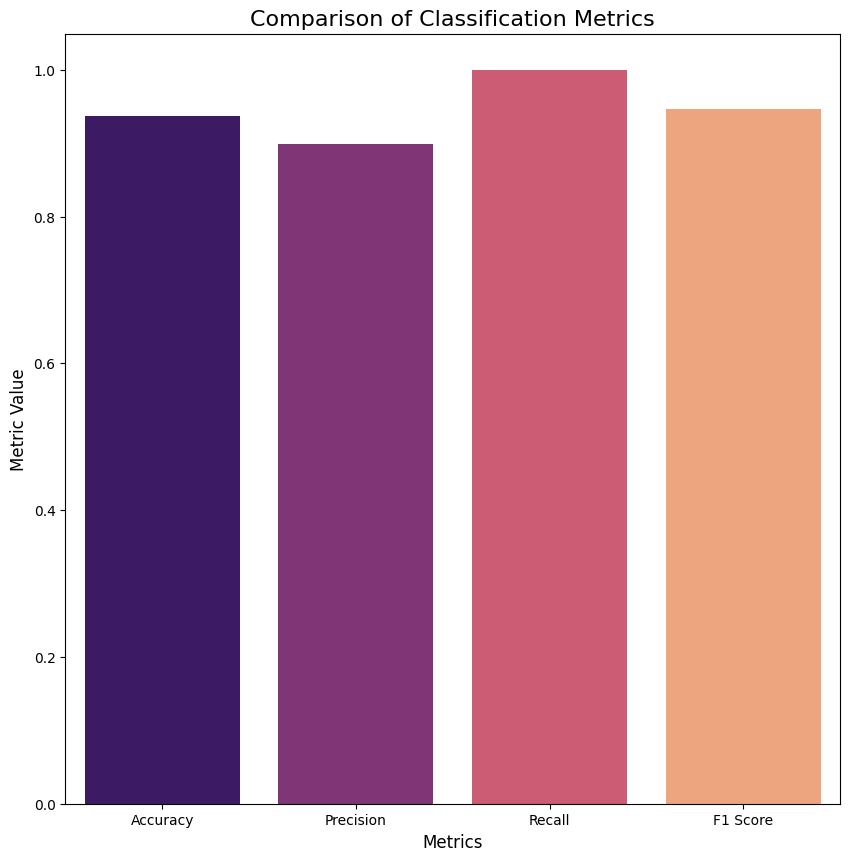

In [79]:
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]
plt.figure(figsize=(10, 10))
sns.barplot(x=metrics, y=values, palette='magma')

plt.title('Comparison of Classification Metrics', fontsize=16)
plt.ylabel('Metric Value', fontsize=12)
#plt.ylim(0, 1) 
plt.xlabel('Metrics', fontsize=12)
plt.show()